In [570]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [571]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

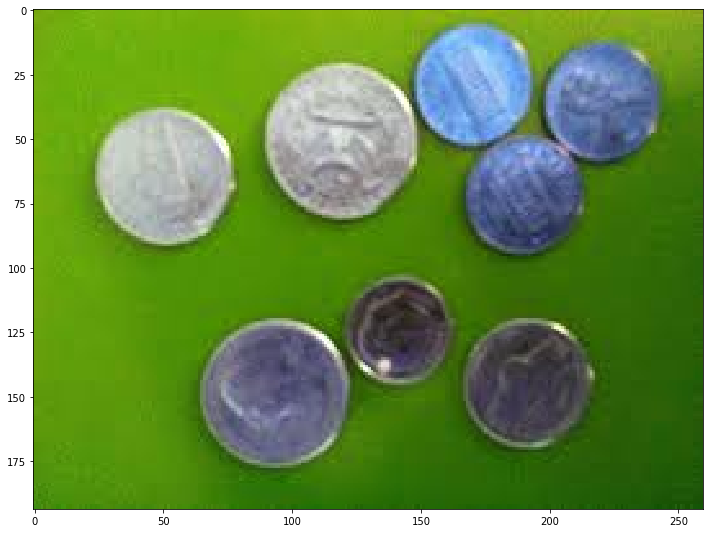

In [572]:
coins=cv2.imread('DATA/PT19.jpg')
display(coins)

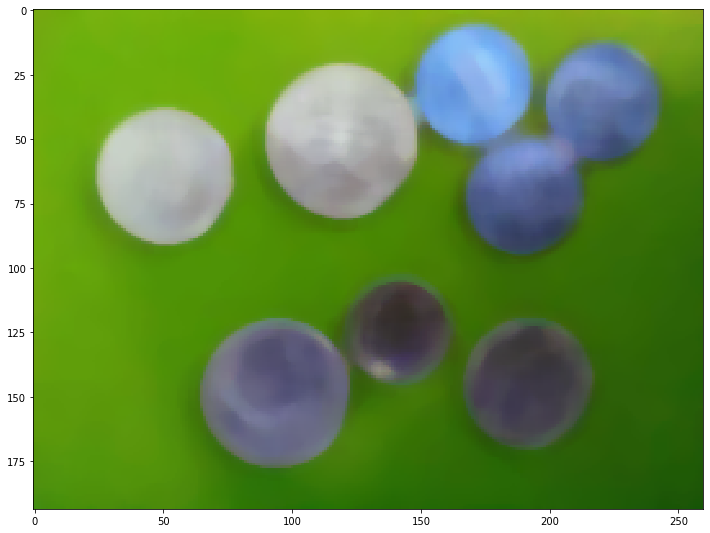

In [573]:
sep_blur=cv2.medianBlur(coins,9)
display(sep_blur)

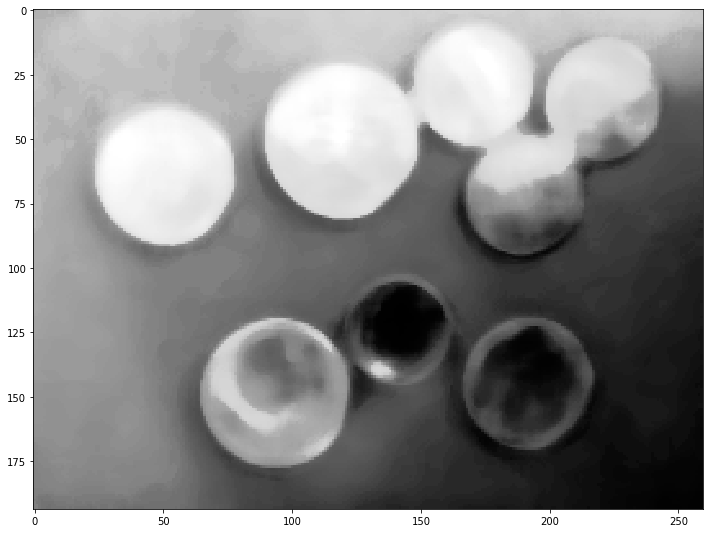

In [574]:
gray_sep_coins=cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
gray_sep_coins = cv2.equalizeHist(gray_sep_coins)
display(gray_sep_coins)

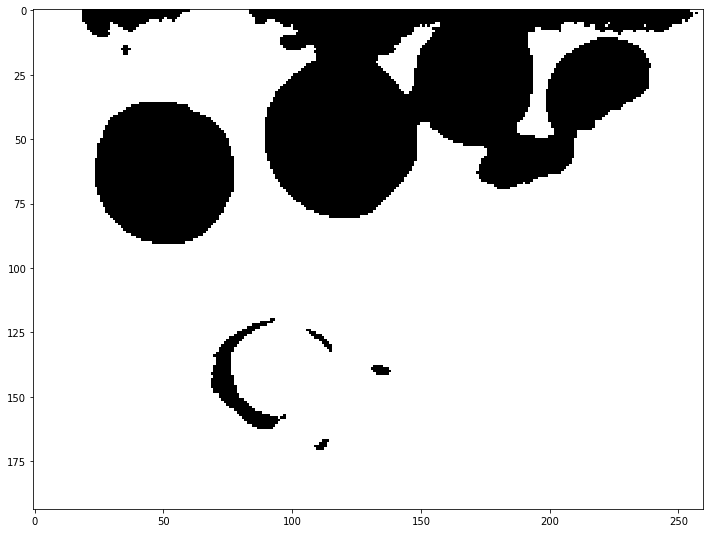

In [575]:
 ret,sep_thresh=cv2.threshold(gray_sep_coins,200,255,cv2.THRESH_BINARY_INV)
display(sep_thresh)


In [576]:
contours,hiearchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [577]:
for i in range (len(contours)):
    if hiearchy[0][i][3] == -1:
        cv2.drawContours(coins,contours,i,(255,0,0),10)

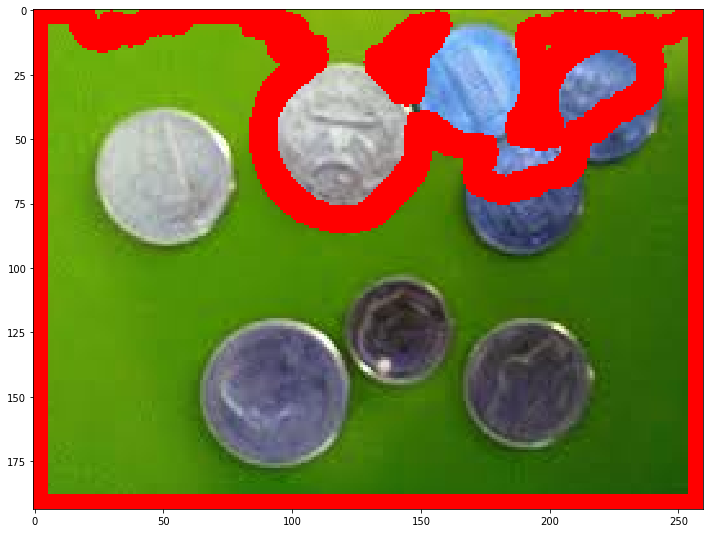

In [578]:
display(coins)

In [579]:
img=cv2.imread('DATA/PT19.jpg')
img=cv2.medianBlur(img,5)

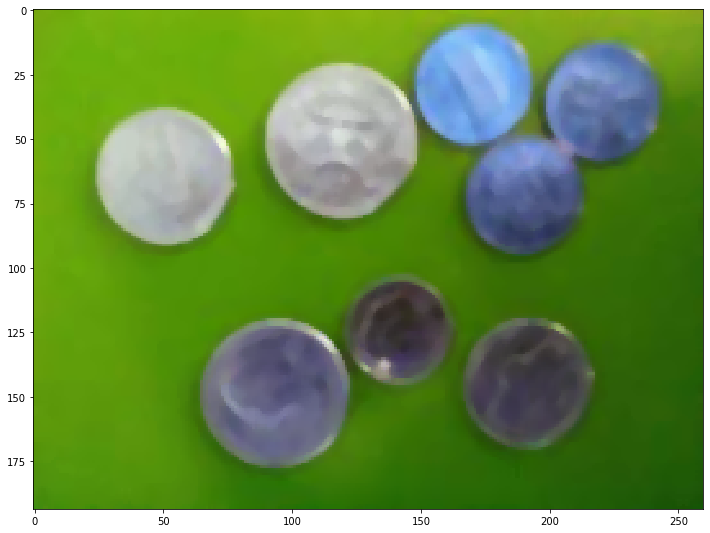

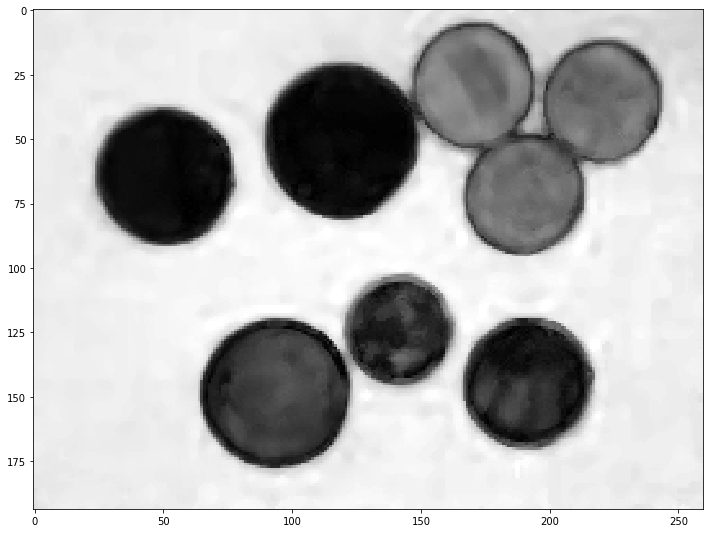

In [580]:
display(img)
#gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
v=hsv_img[:, :, 1]
display(v)
gray=v
#gray=cv2.equalizeHist(gray)

In [581]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

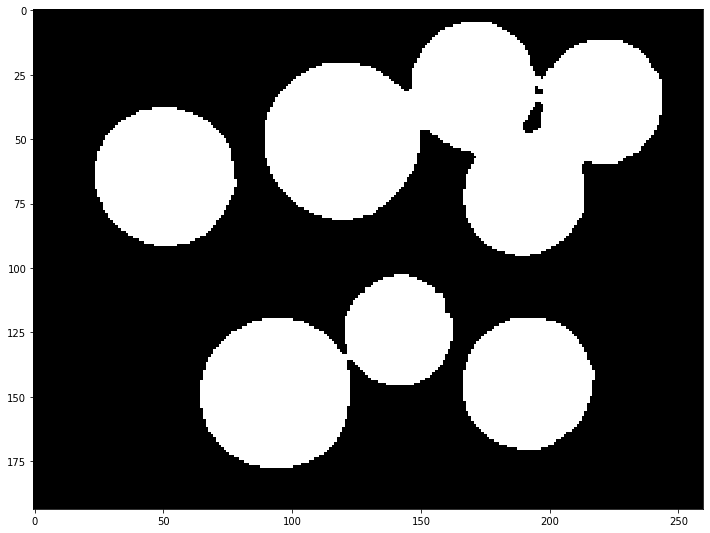

In [582]:
display(thresh)

In [583]:
#noise rm

In [584]:
kernel = np.ones((3,3),np.uint8)

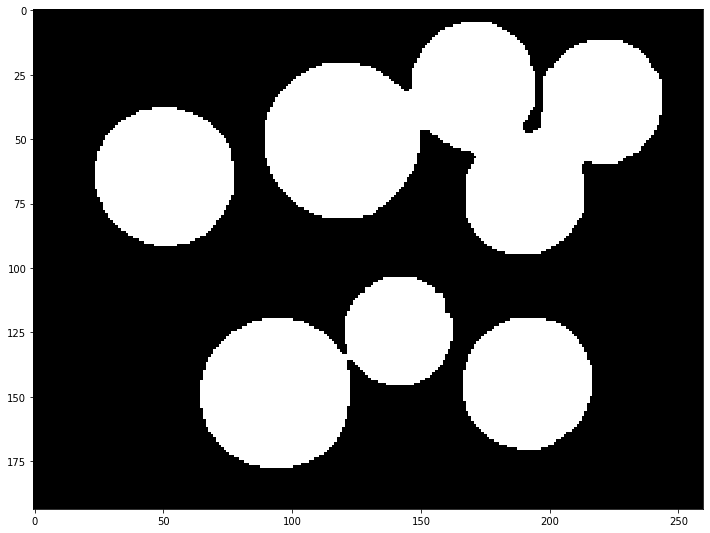

In [585]:
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=4)
display(opening)

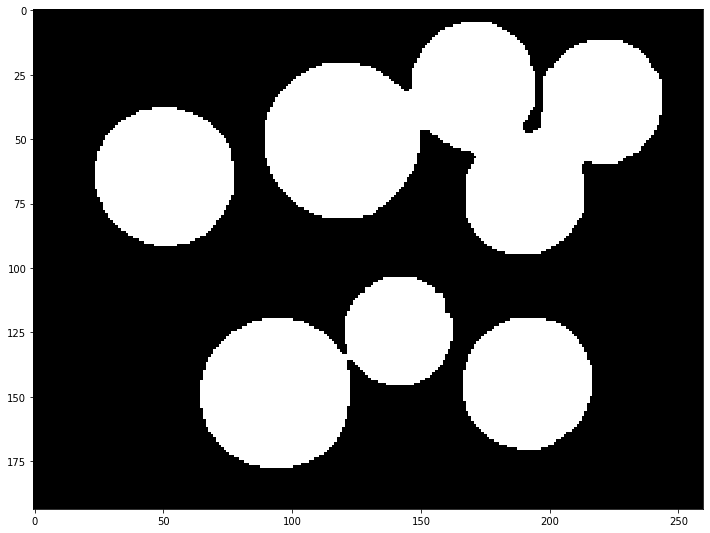

In [586]:
sure_bg=cv2.dilate(opening,kernel,iterations=0)
display(sure_bg)

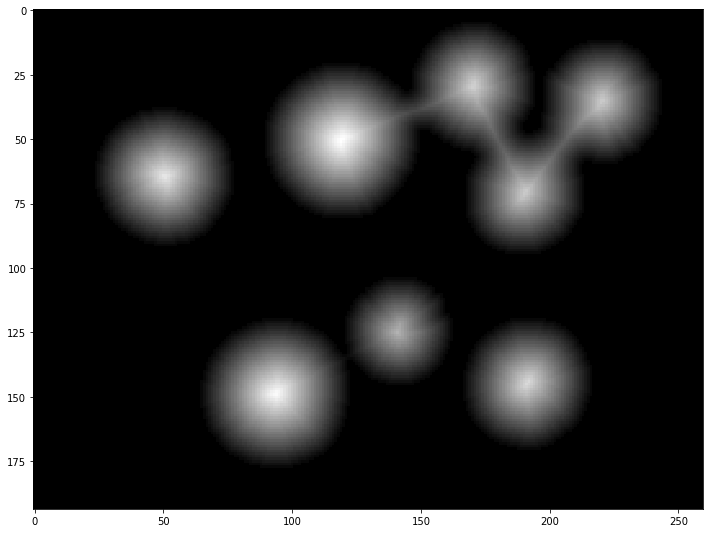

In [587]:
distance_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
display(distance_transform)

In [588]:
ret,sure_fg=cv2.threshold(distance_transform,0.5*distance_transform.max(),255,0)

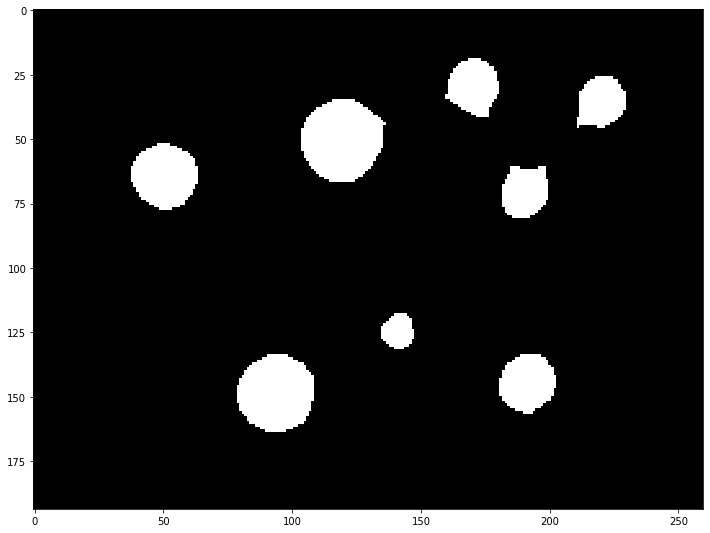

In [589]:
display(sure_fg)

In [590]:
sure_fg = np.uint8(sure_fg)

In [591]:
unknown=cv2.subtract(sure_bg,sure_fg)

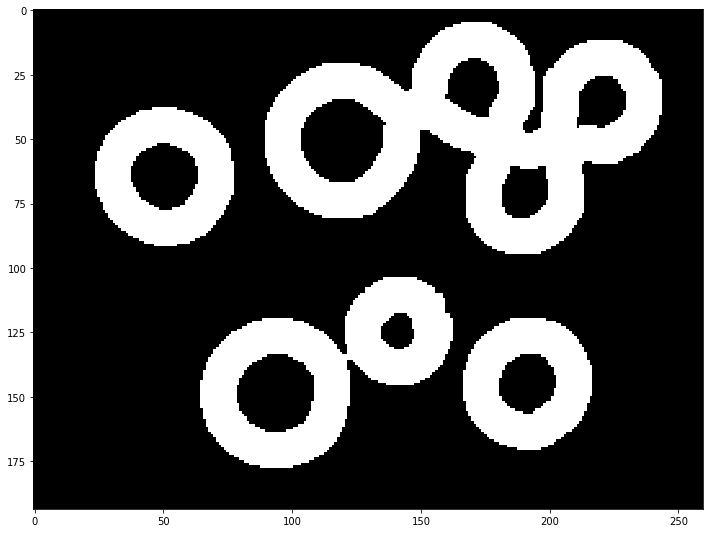

In [592]:
display(unknown)

In [593]:
ret,markers=cv2.connectedComponents(sure_fg)
markers=markers+1

In [594]:
markers[unknown==255]=0

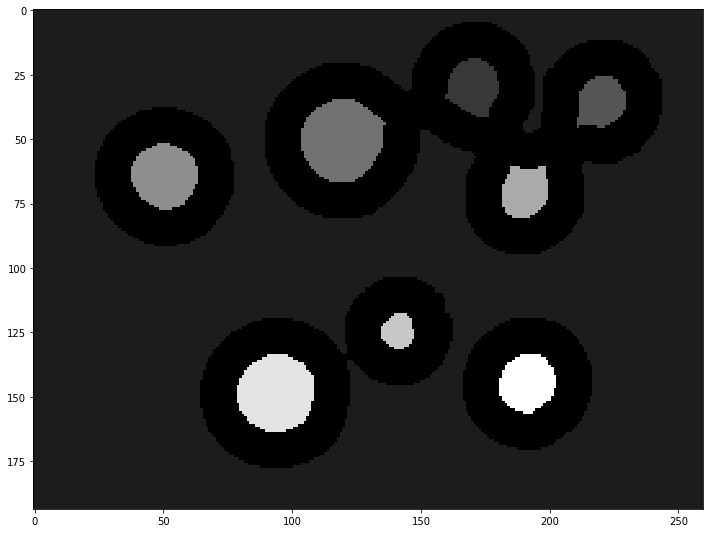

In [595]:
display(markers)

In [596]:
markers = cv2.watershed(img,markers)

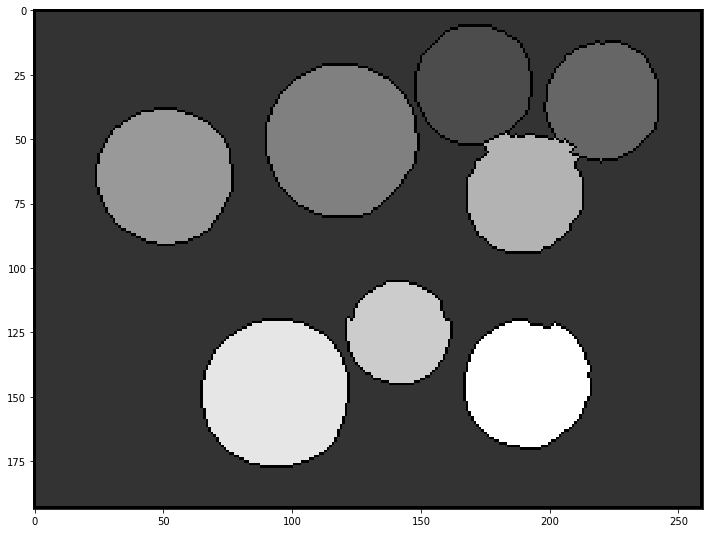

In [597]:
display(markers)

In [598]:
contours,hiearchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range (len(contours)):
    if hiearchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),2)

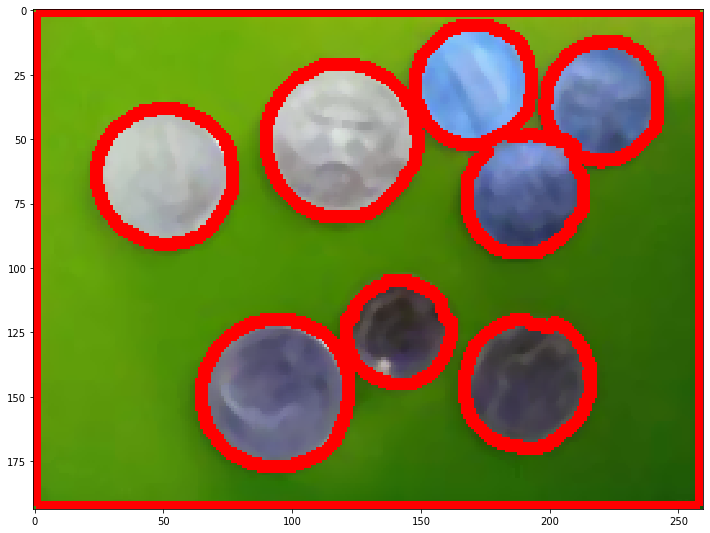

In [599]:
display(img)